Para esse estudo será utilizado o SQLite, pois é uma opção mais adequada para projetos simples e possui uma alta portabilidade, sendo funcional em várias plataformas. Ele é amplamente utilizado em aplicativos móveis, desktops e embutidos devido à sua facilidade de integração. O SQLite é um SGDB relacional embutido e de código aberto.

#Importando os dados e as bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sqlalchemy import create_engine, inspect, text

In [ ]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

In [ ]:
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produtos = pd.read_csv(url_produto)
vendedores = pd.read_csv(url_vendedores)

#Criando a Engine

In [ ]:
engine = create_engine("sqlite:///:memory:")

In [ ]:
#criando as tabelas no banco de dados
produtos.to_sql("produtos", engine, index = False)
pedidos.to_sql("pedidos", engine, index = False)
vendedores.to_sql("vendedores", engine, index = False)
itens_pedidos.to_sql("itens_pedidos", engine, index = False)

24527

In [ ]:
#testando a engine
inspector = inspect(engine)
print(inspector.get_table_names())

['itens_pedidos', 'pedidos', 'produtos', 'vendedores']


#Consultando os dados

In [ ]:
#criando funcao para consulta dos dados
def sql_df(query):
  '''
  Cria uma conexão com o banco de dados para executar uma
  consulta e retorna um dataframe com os dados selecionados
  '''
  with engine.connect() as conexao:
    consulta = conexao.execute(text(query))
    dados = consulta.fetchall()

  return pd.DataFrame(dados, columns = consulta.keys())

In [ ]:
#testando funcao
query = '''SELECT condicao
FROM produtos;'''

In [ ]:
sql_df(query)

,Condicao
0,Usado
1,Usado
2,Usado
3,Usado
4,Usado
...,...
200,Usado
201,Usado
202,Usado
203,Usado


In [ ]:
#fazendo as consultas
df_itens_pedidos = sql_df("SELECT valor_total FROM itens_pedidos")
receita = df_itens_pedidos["valor_total"].sum()
receita

45803930

In [ ]:

query = '''SELECT condicao, COUNT(*) AS 'Quantidade'
FROM produtos
GROUP BY condicao;'''

df_produtos = sql_df(query)
df_produtos

,Condicao,Quantidade
0,Novo com etiqueta,22
1,Novo sem etiqueta,7
2,Usado,176


In [ ]:
#definindo a paleta de cores
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
ROXO1 = '#9353FF'

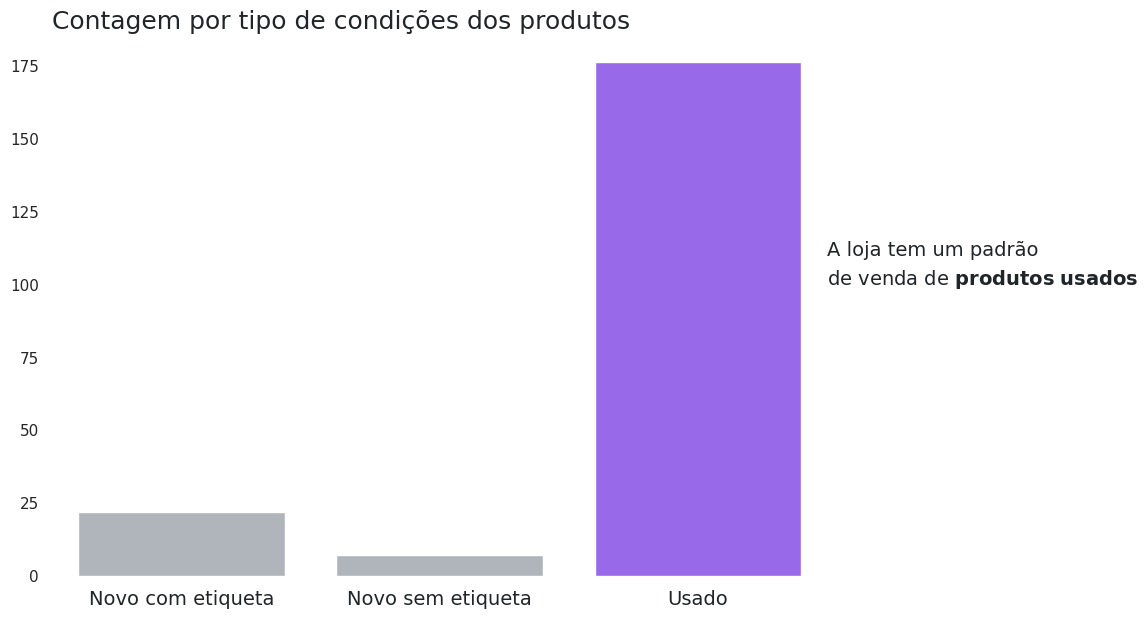

In [ ]:
#criando o gráfico
fig, ax = plt.subplots(figsize = (10,7))
sns.set_theme(style = 'white')

cores = []

#adicionando o highlight
condicao_max_quantidade = df_produtos.loc[df_produtos["Quantidade"].idxmax(), "Condicao"]
for condicao, quantidade in zip(df_produtos["Condicao"], df_produtos["Quantidade"]):
    if condicao == condicao_max_quantidade:
        cores.append(ROXO1)
    else:
        cores.append(CINZA3)

ax = sns.barplot(x=df_produtos["Condicao"], y=df_produtos["Quantidade"], palette=cores)

#personalizando o gráfico
ax.set_title("Contagem por tipo de condições dos produtos", loc="left", fontsize=18, color=CINZA1)
ax.set_xlabel("")
ax.set_ylabel("")
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA1)
sns.despine(left=True, bottom=True)


#colocando textinho
ax.text(2.5,1e2,
         'A loja tem um padrão\nde venda de $\\bf{produtos}$ $\\bf{usados}$',
         fontsize=14, linespacing=1.45, color=CINZA1)

fig = ax.get_figure()

In [ ]:
sql_df ('SELECT * FROM produtos').head(3)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado


In [ ]:
sql_df ('SELECT * FROM itens_pedidos').head(3)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0


In [ ]:
query = '''SELECT produtos.produto, SUM(itens_pedidos.quantidade) AS Quantidade
FROM itens_pedidos, produtos
WHERE itens_pedidos.produto_id = produtos.produto_id
GROUP BY produtos.produto
ORDER BY Quantidade ASC '''

df_quantidade = sql_df(query)
df_quantidade


,produto,Quantidade
0,Vestido Malha Estampa,318
1,Blusa Listrada Malha,322
2,Blusa Malha Azul,325
3,Blusa Babados Off-white,337
4,Blusa Cinza,341
...,...,...
196,Saia Midi Cinto,549
197,Calca Alfaiataria Preta,750
198,Saia Pregas Preta,751
199,Calca Jeans Costuras,755


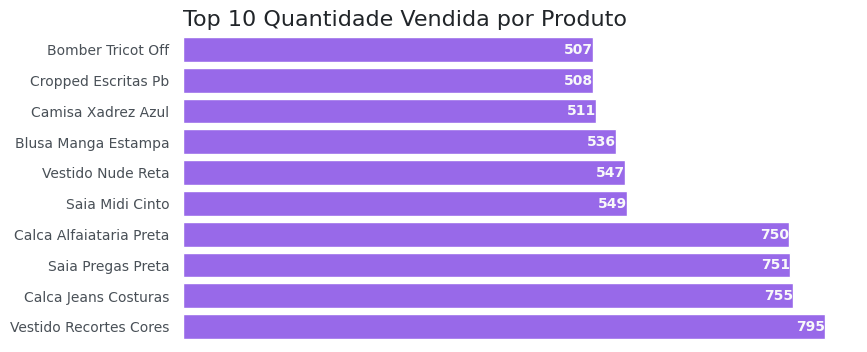

In [ ]:
#criando o gráfico
fig, ax = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=0.8)
sns.set_theme(style="white")


#gerando o gráfico de barras
ax = sns.barplot(y = df_quantidade["produto"][-10:],x = df_quantidade["Quantidade"][-10:], color = ROXO1, orient = "horizontal" )

#personalizando o gráfico
ax.set_title("Top 10 Quantidade Vendida por Produto", fontsize=16, color=CINZA1, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
sns.despine(left = True, bottom = True)


#Escrevendo os valores de cada barra no gráfico
for i, valor in enumerate(df_quantidade["Quantidade"][-10:]):
  qtd = f'{valor}'
  ax.text(valor, i, qtd, color= CINZA5, fontsize=10, fontweight='bold', ha='right', va='center')

fig = ax.get_figure()


In [ ]:
query = '''SELECT produtos.marca, COUNT (*) AS 'Pedidos'
FROM produtos, itens_pedidos
WHERE produtos.produto_id = itens_pedidos.produto_id
GROUP BY produtos.marca
ORDER BY COUNT(*) DESC
LIMIT 15;
'''
df_marcas = sql_df(query)
df_marcas

,marca,Pedidos
0,Zara,2721
1,Mixed,1673
2,Animale,1128
3,Le Lis Blanc,715
4,Banana Republic,584
5,Farm,506
6,H&m,446
7,Sacada,381
8,Shoulder,372
9,Dress&co,360


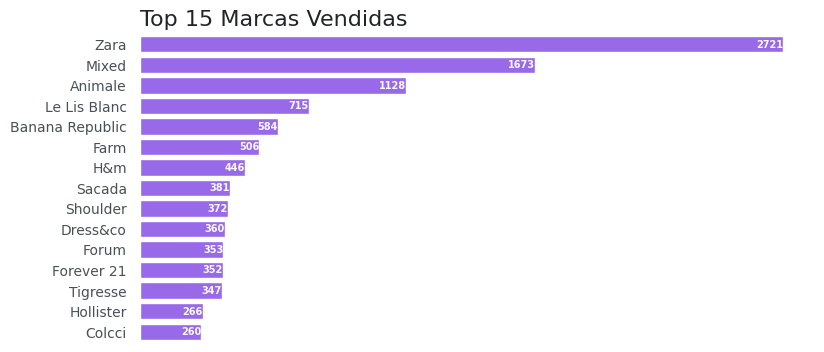

In [ ]:
#criando o gráfico
fig, ax = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right=0.8)
sns.set_theme(style="white")


#gerando o gráfico de barras
ax = sns.barplot(y = df_marcas["marca"],x = df_marcas["Pedidos"], color = ROXO1, orient = "horizontal" )

#personalizando o gráfico
ax.set_title("Top 15 Marcas Vendidas", fontsize=16, color=CINZA1, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
sns.despine(left = True, bottom = True)


#Escrevendo os valores de cada barra no gráfico
for i, valor in enumerate(df_marcas["Pedidos"]):
  qtd = f'{valor}'
  ax.text(valor, i, qtd, color= CINZA5, fontsize=7, fontweight='bold', ha='right', va='center')

fig = ax.get_figure()

In [ ]:
sql_df("SELECT * FROM pedidos").head(3)

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600


In [ ]:
sql_df("SELECT * FROM pedidos").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pedido_id    24527 non-null  int64 
 1   produto_id   24527 non-null  int64 
 2   vendedor_id  24527 non-null  int64 
 3   data_compra  24527 non-null  object
 4   total        24527 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 958.2+ KB


##Consultas Por Ano

In [ ]:
def df_por_ano(ano):

    '''
    Lê o ano escolhido e executa uma série de consultas e coloca numa
    lista que é exibida para o usuário
    '''

    lista_dfs = []

    query1 = f'''
    SELECT vendedores.nome_vendedor, COUNT(pedidos.pedido_id) AS 'Quantidade Vendas',
    ROUND(AVG(pedidos.total),2) AS "Valor Médio por Vendas"
    FROM pedidos, vendedores
    WHERE STRFTIME('%Y', data_compra) = '{ano}' AND vendedores.vendedor_id = pedidos.vendedor_id
    GROUP BY vendedores.nome_vendedor
    ORDER BY COUNT(pedidos.pedido_id) DESC
    '''
    df1 = sql_df(query1)

    query2 = f'''
    SELECT produtos.produto, COUNT(pedidos.pedido_id) AS 'Total de Pedidos'
    FROM pedidos, produtos
    WHERE STRFTIME('%Y', data_compra) = '{ano}' AND pedidos.produto_id = produtos.produto_id
    GROUP BY produtos.produto
    ORDER BY COUNT(pedidos.pedido_id) DESC
    LIMIT 10;
    '''
    df2 = sql_df(query2)

    query3 = f'''
    SELECT STRFTIME('%m', data_compra) AS 'Mes', SUM(total) AS 'Receita'
    FROM pedidos
    WHERE STRFTIME('%Y', data_compra) = '{ano}'
    GROUP BY STRFTIME('%m', data_compra);
    '''
    df3 = sql_df(query3)

    lista_dfs.extend([df1, df2, df3])

    print(f"DataFrames para o ano de {ano}:\n")
    for df in lista_dfs:
        display(df)
        print("\n" + "="*40 + "\n")



In [ ]:
lista = ['2019','2020','2021']

for ano in lista:
    df_por_ano(ano)

DataFrames para o ano de 2019:



,nome_vendedor,Quantidade Vendas,Valor Médio por Vendas
0,Paulo Calanca,2500,1851.73
1,Nadia Oliveira,1480,1940.02
2,Ana Duarte,1414,1904.40
3,Daniel Siqueira,1399,1805.31
4,Millena Pereira,1374,1869.25


,produto,Total de Pedidos
0,Vestido Recortes Cores,85
1,Calca Jeans Costuras,81
2,Saia Pregas Preta,73
3,Calca Alfaiataria Preta,66
4,Camisa Xadrez Azul,60
5,Bomber Tricot Off,56
6,Shorts Bordado Branco,55
7,Blusa Manga Estampa,54
8,Saia Midi Cinto,53
9,Saia Evase Cinza,53


,Mes,Receita
0,01,260616
1,02,548144
2,03,883559
3,04,904471
4,05,1202017
5,06,1112627
6,07,1366542
7,08,1444138
8,09,1660723
9,10,1613431




DataFrames para o ano de 2020:



,nome_vendedor,Quantidade Vendas,Valor Médio por Vendas
0,Ana Duarte,3427,1843.45
1,Daniel Siqueira,3338,1972.34
2,Nadia Oliveira,2782,1818.34
3,Millena Pereira,2510,1894.61
4,Paulo Calanca,2488,1813.47


,produto,Total de Pedidos
0,Calca Alfaiataria Preta,149
1,Vestido Recortes Cores,135
2,Saia Pregas Preta,129
3,Calca Jeans Costuras,127
4,Blusa Veludo Flores,93
5,Shorts Jeans Tye Dye,92
6,Sapato Cetim Pink,90
7,Saia Midi Cinto,90
8,Camisa Fio Animalprint,90
9,Vestido Longo Estampa,89


,Mes,Receita
0,01,2458252
1,02,2168386
2,03,2472297
3,04,2189559
4,05,2168099
5,06,1577791
6,07,1881010
7,08,2268550
8,09,2428227
9,10,2079915




DataFrames para o ano de 2021:



,nome_vendedor,Quantidade Vendas,Valor Médio por Vendas
0,Nadia Oliveira,578,1751.77
1,Ana Duarte,326,2099.20
2,Millena Pereira,321,1553.33
3,Paulo Calanca,295,1929.67
4,Daniel Siqueira,295,1778.40


,produto,Total de Pedidos
0,Vestido Preto Bolso,21
1,Calca Jeans Costuras,21
2,Top Cropped Coqueiros,17
3,Vestido Ombro So,15
4,Shorts Bordado Branco,15
5,Saia Pregas Preta,15
6,Macaquinho Tricot Bege,15
7,Blusa Manga Estampa,15
8,Blusa Croche Branca,15
9,Vestido Jeans Babados,14


,Mes,Receita
0,01,2097109
1,02,1140729
2,03,51525


#Por Estado

In [ ]:
query = '''SELECT estado, COUNT(*) AS Pedidos
FROM itens_pedidos
GROUP BY estado
ORDER BY Pedidos DESC;
'''
sql_df(query)


,Estado,Pedidos
0,BR-MA,974
1,BR-DF,953
2,BR-MT,937
3,BR-GO,933
4,BR-PA,932
5,BR-AL,928
6,BR-PE,927
7,BR-RR,925
8,BR-RO,925
9,BR-RN,921


Percebe-se que SP é um estado que vende pouco comparado a outros Estados. Veremos os vendedores, então, que podem focar suas vendas nesse estado e escolher aqueles que já tem uma quantidade de vendas considerável no estado.

In [ ]:
query = '''SELECT vendedores.nome_vendedor, COUNT(*) AS 'Quantidade de Vendas'
FROM pedidos
JOIN vendedores ON vendedores.vendedor_id = pedidos.vendedor_id
JOIN itens_pedidos ON itens_pedidos.pedido_id = pedidos.pedido_id
WHERE itens_pedidos.estado = 'BR-SP'
GROUP BY vendedores.nome_vendedor
ORDER BY COUNT(*) DESC;
'''
sql_df(query)


,nome_vendedor,Quantidade de Vendas
0,Daniel Siqueira,190
1,Paulo Calanca,182
2,Nadia Oliveira,181
3,Ana Duarte,180
4,Millena Pereira,157


In [ ]:
query = '''SELECT produtos.marca, COUNT(*) AS 'Produtos vendidos'
FROM produtos
JOIN itens_pedidos ON itens_pedidos.produto_id = produtos.produto_id
WHERE itens_pedidos.estado = 'BR-SP'
GROUP BY produtos.marca
ORDER BY COUNT(itens_pedidos.produto_id) DESC;
'''
df_marcas_sp = sql_df(query)
df_marcas_sp


,marca,Produtos vendidos
0,Zara,100
1,Mixed,58
2,Animale,44
3,Le Lis Blanc,26
4,Banana Republic,18
...,...,...
111,Topshop,1
112,Morena Rosa,1
113,Erre Erre,1
114,Bobô,1
